# Assignment #5 - Deep Learning

### <font color="red"> DUE: Apr 23 (Tuesday) 11:00 pm </font>  

<font color="blue"> Atefeh Mahdavi </font>

# I. Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

In [29]:
import numpy as np
import json
import csv 
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# from pandas.tools import plotting
import matplotlib.pyplot as plt
from IPython.core.debugger import Tracer
from copy import deepcopy as copy 
%matplotlib inline

# II. Data


This dataset is the insurance dataset from a company based in Singapore. The source of the data is Kaggle website and is tagged as binary classification. 
Ther are 11 attributes in this dataset and the target label is the claim status.
The costumer is if someone files a claim or not. 

### Reading data and preprocessing

In [36]:
with open("travelinsurance.csv") as csvFile:
    csvReader = csv.DictReader(csvFile)
    data = [i for i in csvReader]
df = pd.DataFrame(data)
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.7,,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,,41
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121,42.35,F,44
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,,32
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,,29
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,,44
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99,59.4,,37


In [6]:
print("Size of data= ", df.size)
print("Shape of data= ", df.shape)

Size of data=  696586
Shape of data=  (63326, 11)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
Agency                  63326 non-null object
Agency Type             63326 non-null object
Distribution Channel    63326 non-null object
Product Name            63326 non-null object
Claim                   63326 non-null object
Duration                63326 non-null object
Destination             63326 non-null object
Net Sales               63326 non-null object
Commision (in value)    63326 non-null object
Gender                  63326 non-null object
Age                     63326 non-null object
dtypes: object(11)
memory usage: 5.3+ MB


### Data preprocessing

Converting all the strings to corresponding numbers and dropping unnecessary features.

In [37]:
#converting variables and removing null values
df = df[df.notnull()]
df = df[df.Gender != ""]
df[["Duration", "Net Sales", "Commision (in value)", "Age"]]=df[["Duration", "Net Sales", "Commision (in value)", "Age"]].apply(pd.to_numeric)

disChanneldic = {'Offline': 0, 'Online':1}
claimdic = {"No": -1, "Yes": 1.}
travelagencyid = {'Travel Agency': 0, 'Airlines':1}
genderdic = {"F": 0, "M": 1}
destinationid = {'MALAYSIA': 0, 'UNITED STATES':1, 'NORWAY':2, 'SINGAPORE':3, 'INDIA':4,
       'BRUNEI DARUSSALAM':80, 'AUSTRALIA':81, 'INDONESIA':82, 'THAILAND':83, 'CHINA':12,
       'PHILIPPINES':5, 'HONG KONG':6, 'VIET NAM':7, 'CAMBODIA':8, 'AUSTRIA':9,
       'MYANMAR':10, 'JAPAN':11, 'TAIWAN, PROVINCE OF CHINA':13, 'SRI LANKA':14,
       'UNITED KINGDOM':15, 'FRANCE':16, 'GERMANY':19, 'NETHERLANDS':20, 'MACAO':21,
       'KOREA, REPUBLIC OF':22, 'UNITED ARAB EMIRATES':23, 'DENMARK':24,
       "LAO PEOPLE'S DEMOCRATIC REPUBLIC":25, 'ITALY':26, 'OMAN':27, 'NEW ZEALAND':28,
       'FIJI':29, 'POLAND':30, 'NEPAL':31, 'SPAIN':32, 'CANADA':33, 'BRAZIL':34, 'PORTUGAL':35,
       'IRELAND':36, 'NEW CALEDONIA':37, 'FINLAND':38, 'SAUDI ARABIA':39, 'JORDAN':40,
       'SWEDEN':41, 'GUINEA':42, 'TURKEY':43, 'BANGLADESH':44, 'MONGOLIA':45,
       'AZERBAIJAN':46, 'PAKISTAN':47, 'MOROCCO':48, 'SWITZERLAND':49, 'LITHUANIA':50,
       'MALI':51, 'BELGIUM':52, 'CZECH REPUBLIC':53, 'HUNGARY':54, 'PAPUA NEW GUINEA':55,
       'BAHRAIN':56, 'KENYA':57, 'MAURITIUS':58, 'CYPRUS':59, 'ANGOLA':60, 'BELARUS':61,
       'ESTONIA':62, 'ARGENTINA':63, 'NAMIBIA':64, 'BULGARIA':65, 'PERU':66, 'QATAR':67,
       'ISRAEL':68, 'TURKMENISTAN':69, 'EGYPT':70, 'BHUTAN':71, 'MEXICO':72,
       'IRAN, ISLAMIC REPUBLIC OF':73, 'UZBEKISTAN':74, 'RUSSIAN FEDERATION':75,
       'FRENCH POLYNESIA':76, 'MALDIVES':77, 'SOUTH AFRICA':78, 'CROATIA':79}

df['Claim'] = df['Claim'].apply(lambda x: claimdic[x])
df['Gender'] = df['Gender'].apply(lambda x: genderdic[x])
df['Agency Type'] = df['Agency Type'].apply(lambda x: travelagencyid[x])
df['Destination'] = df['Destination'].apply(lambda x: destinationid[x])
df['Distribution Channel'] = df['Distribution Channel'].apply(lambda x: disChanneldic[x])

df= df.drop(['Agency'],axis=1)
df= df.drop(['Product Name'],axis=1)

Sampleing 10000 data entries from the dataset.

In [38]:

sampleData = df.sample(n=10000, random_state=1)

y = sampleData['Claim']
X = sampleData.drop(['Claim'],axis=1)

X

,Agency Type,Distribution Channel,Duration,Destination,Net Sales,Commision (in value),Gender,Age
45128,1,1,15,3,29.00,7.25,1,47
30491,1,1,368,3,187.85,46.96,1,27
35701,1,1,6,3,35.50,8.88,1,30
27269,1,1,3,23,12.67,4.43,1,48
14791,0,0,279,83,29.00,9.57,0,75
35609,1,1,22,80,50.00,20.00,1,28
39438,1,1,72,7,22.00,7.70,1,41
28578,1,1,9,3,24.50,6.13,1,75
43047,0,0,100,0,29.00,9.57,0,71
15289,0,0,77,0,29.00,9.57,0,42


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 45128 to 9678
Data columns (total 8 columns):
Agency Type             10000 non-null int64
Distribution Channel    10000 non-null int64
Duration                10000 non-null int64
Destination             10000 non-null int64
Net Sales               10000 non-null float64
Commision (in value)    10000 non-null float64
Gender                  10000 non-null int64
Age                     10000 non-null int64
dtypes: float64(2), int64(6)
memory usage: 703.1 KB


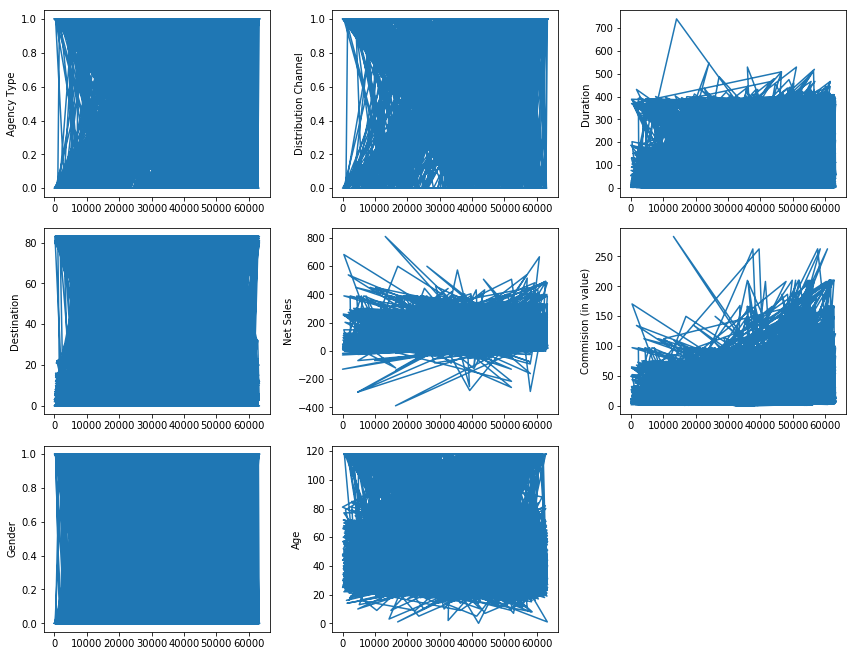

In [13]:
fig = plt.figure(figsize=(12,12))
plt.clf()
for i in range(8):
    plt.subplot(4, 3, i+1)
    plt.plot(X.iloc[:, i])
    plt.ylabel(X.columns.values[i])
fig.tight_layout()

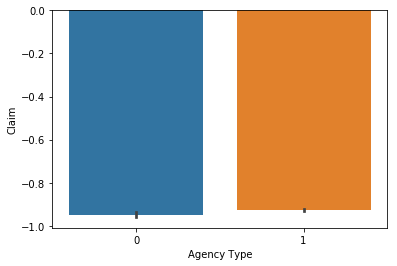

In [21]:
ax2 = sns.barplot(x="Agency Type", y="Claim", data=df)

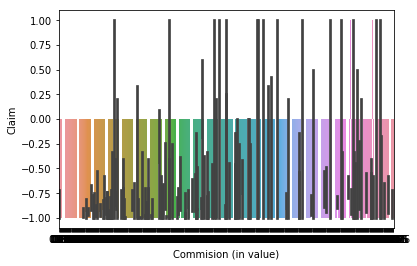

In [16]:
ax3 = sns.barplot(x="Commision (in value)", y="Claim", data=sampleData)

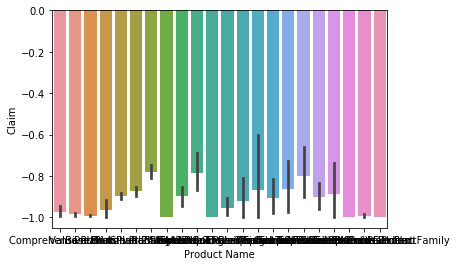

In [20]:
ax7 = sns.barplot(x="Product Name", y="Claim", data=df)

# III. Methods

 
### Feedforward networks

Deep feedforward networks, also often called feedforward neural networks, or multilayer perceptrons(MLPs), are the quintessential deep learning models. The goal of a feedforward network is to approximate some function f*. For example, for a classiﬁer, y = f*(x) maps an input x to a category y. A feedforward network deﬁnes a mapping 
y = f(x;θ) and learns the value of the parameters θ that result in the best function approximation [1].

These models are called feedforward because information ﬂows through the function being evaluated from x, through the intermediate computations used to deﬁne f, and ﬁnally to the output y [1].

### Explanation of the choice for 3 different neural network structures and reason for the selection

#### First Structure Experiments: 

First I wanted to experiment with the impact of changing the activation function from sigmoid to Relu and how it affect the accuracy. These functions were explained during the presentation in the class and the following image is briefly showing the difference.

![title](1.png)


Source [4]

I first set the number of all hidden layers to 10 and then I set the number of hidden layers in an increasing order to see if the number of layers also have an impact on the performance of each activation function.

#### Second Structure Experiments:

In the second experiment I want to see the impact of learning rate on the accuracy for the same network structure between two models.

I read the following information From [3]:

The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. Often in the range between 0.0 and 1.0. Choosing the learning rate is challenging as a value too small may result in a long training process that could get stuck, whereas a value too large may result in learning a sub-optimal set of weights too fast or an unstable training process.

The learning rate may be the most important hyperparameter when configuring your neural network. Therefore it is vital to know how to investigate the effects of the learning rate on model performance and to build an intuition about the dynamics of the learning rate on model behavior.

Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs.

#### Third Structure Experiments:

In the third network structure I want to see how a considerable difference between number of layers can affect the accuracy. 


### Explanation of codes for each structure

The implementations that I am using in this assignment are coming from Edureka deep learning tutrial[2]. I modified the structure of networks for my experiments which I explain below. 

In the one_hot_encode function the following steps are happening: 

First the dataset is being read. Then it will encode the dependent variable and then it defines the encoder function. Then the rows will be mixed up by shuffling and finaly the dataset is converted into train and test part

The structures are different but they follow the same basic logic:
First defining the important parameters and variable to work with the tensors, then defining the number of hidden layers and number of neurons for each layer.The defining the model including the activation function for each layer.
The next step is to define the weights and the biases for each layer. Then all variabels will be initialized and cost function and optimizer will be defined. Finally the cost and accuracy for each epoch will be computed and accuracy plot will be generated. 


In [22]:
import tensorflow as tf

node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly

with tf.Session() as sess:
    op_add = tf.add(node1, node2)
    print(op_add)
    print(sess.run(op_add))

Tensor("Add:0", shape=(), dtype=float32)
7.0


In [ ]:
from sklearn import preprocessing

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

X = preprocessing.MinMaxScaler().fit_transform(X)
original_X = X
original_y = y

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)

X, Y = shuffle(X, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)

### First Structure

6 nodes with 10 hidden layers each RELU 

n_dim 8
epoch :  0  -  cost:  73.59125  - MSE:  3148.918989143979 - Train Accuracy:  0.0335
epoch :  1  -  cost:  30.083149  - MSE:  213028.25749405264 - Train Accuracy:  0.9665
epoch :  2  -  cost:  22.48684  - MSE:  125145.45635505726 - Train Accuracy:  0.9665
epoch :  3  -  cost:  2.3364174  - MSE:  2522.344997966309 - Train Accuracy:  0.9665
epoch :  4  -  cost:  0.5807205  - MSE:  76.98137724070169 - Train Accuracy:  0.9665
epoch :  5  -  cost:  0.3305901  - MSE:  27.2285870577813 - Train Accuracy:  0.9665
epoch :  6  -  cost:  0.15215579  - MSE:  5.336070399901265 - Train Accuracy:  0.9665
epoch :  7  -  cost:  0.15313385  - MSE:  4.65578108394068 - Train Accuracy:  0.9665
epoch :  8  -  cost:  0.19538845  - MSE:  10.014831509035137 - Train Accuracy:  0.9665
epoch :  9  -  cost:  0.86035645  - MSE:  2.6077728925187795 - Train Accuracy:  0.165125
epoch :  10  -  cost:  3.9763129  - MSE:  3414.2647736435724 - Train Accuracy:  0.9665
epoch :  11  -  cost:  1.8904477  - MSE:  794.982

epoch :  95  -  cost:  0.14641036  - MSE:  2.436135505396059 - Train Accuracy:  0.9665
epoch :  96  -  cost:  0.14640853  - MSE:  2.4360520209493965 - Train Accuracy:  0.9665
epoch :  97  -  cost:  0.14640445  - MSE:  2.4359699623719955 - Train Accuracy:  0.9665
epoch :  98  -  cost:  0.14640255  - MSE:  2.435893444950377 - Train Accuracy:  0.9665
epoch :  99  -  cost:  0.14640142  - MSE:  2.435797861123404 - Train Accuracy:  0.9665


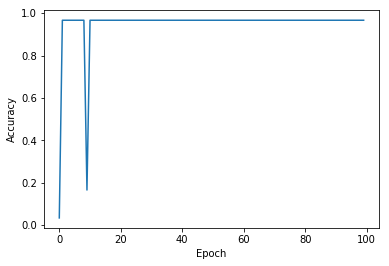

Test Accuracy:  0.9615
MSE: 2.4358


In [57]:
 
learning_rate = 0.1
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2

n_hidden_1 = 10
n_hidden_2 = 10
n_hidden_3 = 10
n_hidden_4 = 10
n_hidden_5 = 10
n_hidden_6 = 10
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.relu(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.relu(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)
#Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
 
#Final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
 
#Final mean square error
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

6 nodes with 10 hidden layers each Sigmoid

n_dim 8
epoch :  0  -  cost:  0.7601202  - MSE:  0.9573831637465041 - Train Accuracy:  0.0335
epoch :  1  -  cost:  0.4679109  - MSE:  0.6980649856902681 - Train Accuracy:  0.9665
epoch :  2  -  cost:  0.34186402  - MSE:  0.6643866122683582 - Train Accuracy:  0.9665
epoch :  3  -  cost:  0.2781993  - MSE:  0.701974078629599 - Train Accuracy:  0.9665
epoch :  4  -  cost:  0.24141754  - MSE:  0.7627998172755286 - Train Accuracy:  0.9665
epoch :  5  -  cost:  0.21807387  - MSE:  0.8303957753418367 - Train Accuracy:  0.9665
epoch :  6  -  cost:  0.20224379  - MSE:  0.8984432484887105 - Train Accuracy:  0.9665
epoch :  7  -  cost:  0.19097571  - MSE:  0.9643737412068955 - Train Accuracy:  0.9665
epoch :  8  -  cost:  0.18265484  - MSE:  1.0271614123130535 - Train Accuracy:  0.9665
epoch :  9  -  cost:  0.17633148  - MSE:  1.0864641548163136 - Train Accuracy:  0.9665
epoch :  10  -  cost:  0.17141464  - MSE:  1.1422538421945994 - Train Accuracy:  0.9665
epoch :  11  -  cost:  0.16751906  - M

epoch :  94  -  cost:  0.1466087  - MSE:  2.120023058445754 - Train Accuracy:  0.9665
epoch :  95  -  cost:  0.14660819  - MSE:  2.1209769318278866 - Train Accuracy:  0.9665
epoch :  96  -  cost:  0.14660776  - MSE:  2.1218909819600253 - Train Accuracy:  0.9665
epoch :  97  -  cost:  0.14660735  - MSE:  2.1227669749821714 - Train Accuracy:  0.9665
epoch :  98  -  cost:  0.146607  - MSE:  2.1236061452403154 - Train Accuracy:  0.9665
epoch :  99  -  cost:  0.1466066  - MSE:  2.124410274618072 - Train Accuracy:  0.9665


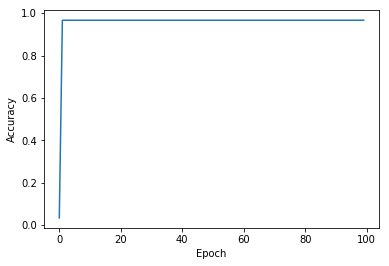

Test Accuracy:  0.9615
MSE: 2.1244


In [54]:

learning_rate = 0.1
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2

n_hidden_1 = 10
n_hidden_2 = 10
n_hidden_3 = 10
n_hidden_4 = 10
n_hidden_5 = 10
n_hidden_6 = 10
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)
#Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
 
#Final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
 
#Final mean square error
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

6 nodes with increasing number of hidden layers each Sigmoid

n_dim 8
epoch :  0  -  cost:  0.14816101  - MSE:  11.12017325812337 - Train Accuracy:  0.9665
epoch :  1  -  cost:  0.14789753  - MSE:  11.194023539588688 - Train Accuracy:  0.9665
epoch :  2  -  cost:  0.14776687  - MSE:  11.24384382219956 - Train Accuracy:  0.9665
epoch :  3  -  cost:  0.1476987  - MSE:  11.277333833909928 - Train Accuracy:  0.9665
epoch :  4  -  cost:  0.147661  - MSE:  11.29946421505067 - Train Accuracy:  0.9665
epoch :  5  -  cost:  0.14763878  - MSE:  11.313572463611822 - Train Accuracy:  0.9665
epoch :  6  -  cost:  0.14762442  - MSE:  11.321950026897973 - Train Accuracy:  0.9665
epoch :  7  -  cost:  0.1476141  - MSE:  11.326210138488351 - Train Accuracy:  0.9665
epoch :  8  -  cost:  0.147606  - MSE:  11.327489567391346 - Train Accuracy:  0.9665
epoch :  9  -  cost:  0.14759906  - MSE:  11.326610432812055 - Train Accuracy:  0.9665
epoch :  10  -  cost:  0.1475926  - MSE:  11.324156854321421 - Train Accuracy:  0.9665
epoch :  11  -  cost:  0.14758664  - MSE:  1

epoch :  94  -  cost:  0.14714938  - MSE:  10.789105462149347 - Train Accuracy:  0.9665
epoch :  95  -  cost:  0.14714447  - MSE:  10.782857056280157 - Train Accuracy:  0.9665
epoch :  96  -  cost:  0.14713965  - MSE:  10.776616011654479 - Train Accuracy:  0.9665
epoch :  97  -  cost:  0.1471348  - MSE:  10.770381832328203 - Train Accuracy:  0.9665
epoch :  98  -  cost:  0.14712992  - MSE:  10.764154022452052 - Train Accuracy:  0.9665
epoch :  99  -  cost:  0.14712507  - MSE:  10.757935380219571 - Train Accuracy:  0.9665


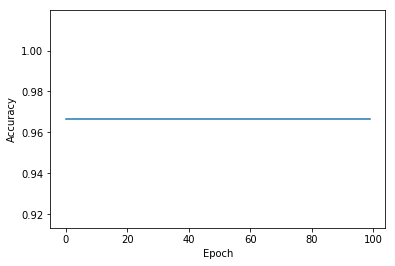

Test Accuracy:  0.9615
MSE: 10.7579


In [61]:
 
learning_rate = 0.1
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2

n_hidden_1 = 10
n_hidden_2 = 20
n_hidden_3 = 30
n_hidden_4 = 40
n_hidden_5 = 50
n_hidden_6 = 60
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)
#Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
 
#Final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
 
#Final mean square error
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

6 nodes with increasing hidden layers each RELU

n_dim 8
epoch :  0  -  cost:  0.19141169  - MSE:  7.1807803471122105 - Train Accuracy:  0.9665
epoch :  1  -  cost:  0.1837231  - MSE:  6.640814543640947 - Train Accuracy:  0.9665
epoch :  2  -  cost:  0.17664914  - MSE:  6.156338727192419 - Train Accuracy:  0.9665
epoch :  3  -  cost:  0.17026788  - MSE:  5.725956372153278 - Train Accuracy:  0.9665
epoch :  4  -  cost:  0.1646476  - MSE:  5.347933031026139 - Train Accuracy:  0.9665
epoch :  5  -  cost:  0.15983628  - MSE:  5.020093663998962 - Train Accuracy:  0.9665
epoch :  6  -  cost:  0.15585092  - MSE:  4.73973359569521 - Train Accuracy:  0.9665
epoch :  7  -  cost:  0.15266974  - MSE:  4.503563949629685 - Train Accuracy:  0.9665
epoch :  8  -  cost:  0.15023074  - MSE:  4.307726493524593 - Train Accuracy:  0.9665
epoch :  9  -  cost:  0.14843778  - MSE:  4.147896343906043 - Train Accuracy:  0.9665
epoch :  10  -  cost:  0.14717433  - MSE:  4.019457058085674 - Train Accuracy:  0.9665
epoch :  11  -  cost:  0.1463194  - MSE:  3.917

epoch :  94  -  cost:  0.14431721  - MSE:  3.5524073237238736 - Train Accuracy:  0.9665
epoch :  95  -  cost:  0.1443104  - MSE:  3.5518459712759594 - Train Accuracy:  0.9665
epoch :  96  -  cost:  0.14430363  - MSE:  3.5512834401177527 - Train Accuracy:  0.9665
epoch :  97  -  cost:  0.14429681  - MSE:  3.55071914745631 - Train Accuracy:  0.9665
epoch :  98  -  cost:  0.14428999  - MSE:  3.550153591074973 - Train Accuracy:  0.9665
epoch :  99  -  cost:  0.1442832  - MSE:  3.5495867358897293 - Train Accuracy:  0.9665


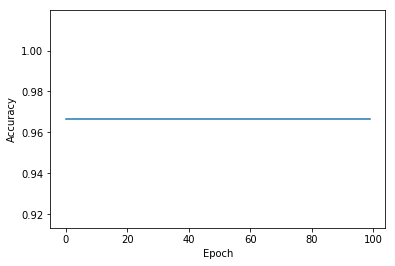

Test Accuracy:  0.9615
MSE: 3.5496


In [52]:

 
learning_rate = 0.1
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2

n_hidden_1 = 10
n_hidden_2 = 20
n_hidden_3 = 30
n_hidden_4 = 40
n_hidden_5 = 50
n_hidden_6 = 60
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.relu(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.relu(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)
#Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
 
#Final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
 
#Final mean square error
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

### Second Structure

Learning rate: 1

6 nodes with 10 hidden layers each with three RELU and three Sigmoid functions

n_dim 8
epoch :  0  -  cost:  0.20557922  - MSE:  6.727825267189819 - Train Accuracy:  0.9665
epoch :  1  -  cost:  0.1971257  - MSE:  6.044802808424958 - Train Accuracy:  0.9665
epoch :  2  -  cost:  0.18909347  - MSE:  5.41428811987922 - Train Accuracy:  0.9665
epoch :  3  -  cost:  0.18157566  - MSE:  4.8370191468951145 - Train Accuracy:  0.9665
epoch :  4  -  cost:  0.17467462  - MSE:  4.3138693610096945 - Train Accuracy:  0.9665
epoch :  5  -  cost:  0.16849461  - MSE:  3.845566613584745 - Train Accuracy:  0.9665
epoch :  6  -  cost:  0.16312775  - MSE:  3.4324185292492295 - Train Accuracy:  0.9665
epoch :  7  -  cost:  0.15863678  - MSE:  3.074006027664542 - Train Accuracy:  0.9665
epoch :  8  -  cost:  0.15503794  - MSE:  2.7688986576875885 - Train Accuracy:  0.9665
epoch :  9  -  cost:  0.15229149  - MSE:  2.5144639220111995 - Train Accuracy:  0.9665
epoch :  10  -  cost:  0.15030313  - MSE:  2.306824966729946 - Train Accuracy:  0.9665
epoch :  11  -  cost:  0.14894  - MSE:  2.

epoch :  94  -  cost:  0.14673226  - MSE:  1.6353874753354025 - Train Accuracy:  0.9665
epoch :  95  -  cost:  0.1467313  - MSE:  1.6353988351995992 - Train Accuracy:  0.9665
epoch :  96  -  cost:  0.14673044  - MSE:  1.635410374458208 - Train Accuracy:  0.9665
epoch :  97  -  cost:  0.14672959  - MSE:  1.635422378818701 - Train Accuracy:  0.9665
epoch :  98  -  cost:  0.14672858  - MSE:  1.635434212362568 - Train Accuracy:  0.9665
epoch :  99  -  cost:  0.14672767  - MSE:  1.63544669226909 - Train Accuracy:  0.9665


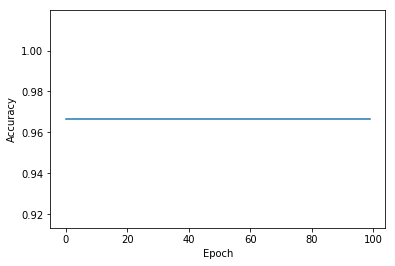

Test Accuracy:  0.9615
MSE: 1.6354


In [59]:
learning_rate = 1
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2

n_hidden_1 = 10
n_hidden_2 = 10
n_hidden_3 = 10
n_hidden_4 = 10
n_hidden_5 = 10
n_hidden_6 = 10
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)
#Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
 
#Final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
 
#Final mean square error
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

Learning rate: 0.1

6 nodes with 10 hidden layers each with three RELU and three Sigmoid functions

n_dim 8
epoch :  0  -  cost:  0.70101255  - MSE:  1.9154586762475825 - Train Accuracy:  0.455
epoch :  1  -  cost:  0.50755996  - MSE:  1.6849065838076671 - Train Accuracy:  0.9665
epoch :  2  -  cost:  0.3990552  - MSE:  1.5946515287004914 - Train Accuracy:  0.9665
epoch :  3  -  cost:  0.33249828  - MSE:  1.5683322680131178 - Train Accuracy:  0.9665
epoch :  4  -  cost:  0.28899717  - MSE:  1.5744884893883586 - Train Accuracy:  0.9665
epoch :  5  -  cost:  0.25902733  - MSE:  1.5977462278946448 - Train Accuracy:  0.9665
epoch :  6  -  cost:  0.23748223  - MSE:  1.6301049958077332 - Train Accuracy:  0.9665
epoch :  7  -  cost:  0.22145331  - MSE:  1.667185201905845 - Train Accuracy:  0.9665
epoch :  8  -  cost:  0.20919198  - MSE:  1.7064885866673851 - Train Accuracy:  0.9665
epoch :  9  -  cost:  0.19959585  - MSE:  1.7465489206822282 - Train Accuracy:  0.9665
epoch :  10  -  cost:  0.19194151  - MSE:  1.7864875558477142 - Train Accuracy:  0.9665
epoch :  11  -  cost:  0.18573757  - 

epoch :  94  -  cost:  0.14685163  - MSE:  2.8169681789422474 - Train Accuracy:  0.9665
epoch :  95  -  cost:  0.14684579  - MSE:  2.818907369028377 - Train Accuracy:  0.9665
epoch :  96  -  cost:  0.14684011  - MSE:  2.8207808693048833 - Train Accuracy:  0.9665
epoch :  97  -  cost:  0.14683464  - MSE:  2.8225912384424476 - Train Accuracy:  0.9665
epoch :  98  -  cost:  0.14682935  - MSE:  2.8243403061512815 - Train Accuracy:  0.9665
epoch :  99  -  cost:  0.14682415  - MSE:  2.8260299984399424 - Train Accuracy:  0.9665


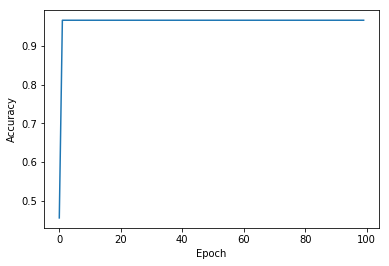

Test Accuracy:  0.9615
MSE: 2.8260


In [63]:
learning_rate = 0.1
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2

n_hidden_1 = 10
n_hidden_2 = 10
n_hidden_3 = 10
n_hidden_4 = 10
n_hidden_5 = 10
n_hidden_6 = 10
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)
#Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
 
#Final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
 
#Final mean square error
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

### Third Structure
Relatively Large number of layers in comparison to the previous structures

n_dim 8
epoch :  0  -  cost:  2.4425852  - MSE:  1316.6291130625475 - Train Accuracy:  0.9665
epoch :  1  -  cost:  2.0973957  - MSE:  1000.5387972086379 - Train Accuracy:  0.9665
epoch :  2  -  cost:  1.8073921  - MSE:  802.7696819956489 - Train Accuracy:  0.9665
epoch :  3  -  cost:  1.5434147  - MSE:  628.8377404540478 - Train Accuracy:  0.9665
epoch :  4  -  cost:  1.3216963  - MSE:  511.4214238376013 - Train Accuracy:  0.9665
epoch :  5  -  cost:  0.999745  - MSE:  397.3746891377049 - Train Accuracy:  0.9665
epoch :  6  -  cost:  0.7897894  - MSE:  298.1366481727298 - Train Accuracy:  0.9665
epoch :  7  -  cost:  0.6072602  - MSE:  238.10499495360867 - Train Accuracy:  0.9665
epoch :  8  -  cost:  0.44340417  - MSE:  197.34380105694174 - Train Accuracy:  0.9665
epoch :  9  -  cost:  0.39000928  - MSE:  152.60482924792316 - Train Accuracy:  0.897375
epoch :  10  -  cost:  0.512127  - MSE:  206.53393386698176 - Train Accuracy:  0.9665
epoch :  11  -  cost:  0.35391188  - MSE:  164.9

epoch :  93  -  cost:  0.1453695  - MSE:  119.5425979330167 - Train Accuracy:  0.966125
epoch :  94  -  cost:  0.15477559  - MSE:  120.14813959863697 - Train Accuracy:  0.9665
epoch :  95  -  cost:  0.15523748  - MSE:  113.89211002678435 - Train Accuracy:  0.9655
epoch :  96  -  cost:  0.20485699  - MSE:  121.77585730339477 - Train Accuracy:  0.9665
epoch :  97  -  cost:  0.13892698  - MSE:  113.95578831844395 - Train Accuracy:  0.966625
epoch :  98  -  cost:  0.13835032  - MSE:  114.86556174991763 - Train Accuracy:  0.966625
epoch :  99  -  cost:  0.14013422  - MSE:  114.01202262938729 - Train Accuracy:  0.96575


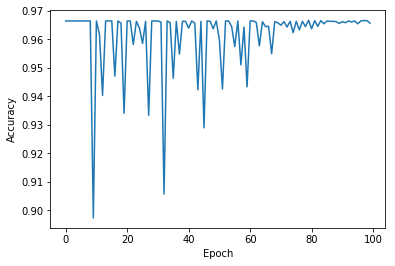

Test Accuracy:  0.9605
MSE: 114.0120


In [65]:
learning_rate = 0.1
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2

n_hidden_1 = 100
n_hidden_2 = 200
n_hidden_3 = 300
n_hidden_4 = 400
n_hidden_5 = 500
n_hidden_6 = 600
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)
#Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
 
#Final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
 
#Final mean square error
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

Less number (half) of layers compared to the previous one

epoch :  0  -  cost:  0.61825454  - MSE:  193.2408319036713 - Train Accuracy:  0.964875
epoch :  1  -  cost:  0.44706774  - MSE:  154.2591799012184 - Train Accuracy:  0.9645
epoch :  2  -  cost:  0.32362232  - MSE:  141.48593284005418 - Train Accuracy:  0.964
epoch :  3  -  cost:  0.2542342  - MSE:  134.5799835859808 - Train Accuracy:  0.962875
epoch :  4  -  cost:  0.20955694  - MSE:  125.384058177076 - Train Accuracy:  0.960375
epoch :  5  -  cost:  0.18786629  - MSE:  125.3850156444043 - Train Accuracy:  0.96275
epoch :  6  -  cost:  0.17410971  - MSE:  124.62801902389535 - Train Accuracy:  0.962625
epoch :  7  -  cost:  0.1659497  - MSE:  125.55328056429899 - Train Accuracy:  0.963375
epoch :  8  -  cost:  0.16265486  - MSE:  124.33427223549933 - Train Accuracy:  0.9635
epoch :  9  -  cost:  0.159725  - MSE:  124.4474633019933 - Train Accuracy:  0.9645
epoch :  10  -  cost:  0.16470456  - MSE:  128.11347908031055 - Train Accuracy:  0.965125
epoch :  11  -  cost:  0.15984045  - MSE:

epoch :  93  -  cost:  0.12890856  - MSE:  122.87166851850463 - Train Accuracy:  0.967125
epoch :  94  -  cost:  0.12846747  - MSE:  123.98200954438599 - Train Accuracy:  0.966875
epoch :  95  -  cost:  0.12713498  - MSE:  122.0250457290917 - Train Accuracy:  0.96675
epoch :  96  -  cost:  0.12880227  - MSE:  124.84164851426772 - Train Accuracy:  0.967
epoch :  97  -  cost:  0.12899102  - MSE:  122.34355077347061 - Train Accuracy:  0.966875
epoch :  98  -  cost:  0.13155098  - MSE:  124.75393834239553 - Train Accuracy:  0.96675
epoch :  99  -  cost:  0.13105652  - MSE:  122.60389770132215 - Train Accuracy:  0.9665


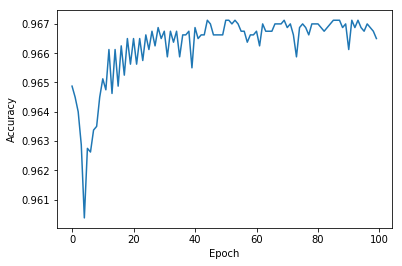

Test Accuracy:  0.9595
MSE: 122.6039


In [42]:
learning_rate = 0.1
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2


n_hidden_1 = 50
n_hidden_2 = 100
n_hidden_3 = 150
n_hidden_4 = 200
n_hidden_5 = 250
n_hidden_6 = 300
 
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])
 
def deep_learning(x, weights, biases):
 
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
 
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
 
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
 
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.sigmoid(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer
  
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'h6': tf.Variable(tf.truncated_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_6, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5': tf.Variable(tf.truncated_normal([n_hidden_5])),
    'b6': tf.Variable(tf.truncated_normal([n_hidden_6])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}
 

init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
y = deep_learning(x, weights, biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
sess = tf.Session()
sess.run(init)
 
mse_history = []
accuracy_history = []
 
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
 
    print('epoch : ', epoch, ' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)
#Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
 
#Final accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
 
#Final mean square error
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

# IV - Results

Based on what I observed in the first structure experiment for the same number of layers (smaller number like 10) there is no significant difference between the RELU and sigmoid other that the fluctuation of the accuracy in the earlier epochs for the RELU. Sigmoid function reached the maximum accuracy immediately after the first epoch. However the MSE value is less for the Sigmoid case so it is performing better.

RELU 10 hidden layers:

Test Accuracy:  0.9615
MSE: 2.4358

Sigmoid 10 hidden layers:

Test Accuracy:  0.9615
MSE: 2.1244


However in the increasing number of layers they both remaind equally the same during all the epochs and I didn't observe any difference. But The MSE values are considerably different and RELU ins performing considerably better. 

Sigmoid increasing number of hidden layers:

Test Accuracy:  0.9615
MSE: 10.7579

RELU increasing number of hidden layers:

Test Accuracy:  0.9615
MSE: 3.5496


For the Second Structure I looked into learning rate for the same structure. 6 nodes with 10 hidden layers each with three RELU and three Sigmoid functions. The MSE value is less for the higher learning rate which was predictable based on the initial explanations regarding the learning rate for the same number of epochs. 

Learning_rate = 1

Test Accuracy:  0.9615
MSE: 1.6354

Learning_rate = 0.1

Test Accuracy:  0.9615
MSE: 2.8260


For the third structure I changes the number of layers to larger numbers. With higher number of layers the accuracy is higher and MSE is also lower so the model is performing better overall. But there are higher fluctuations in differnt epochs. 

n_hidden_1 = 100
n_hidden_2 = 200
n_hidden_3 = 300
n_hidden_4 = 400
n_hidden_5 = 500
n_hidden_6 = 600

Test Accuracy:  0.9605
MSE: 114.0120

n_hidden_1 = 50
n_hidden_2 = 100
n_hidden_3 = 150
n_hidden_4 = 200
n_hidden_5 = 250
n_hidden_6 = 300

Test Accuracy:  0.9595
MSE: 122.6039


Visualizations are available in below the above experiments.

# Conclusions

This assignment was the least challenging assignment so far. However, it was useful in term of getting insights about the impact of some of the important variables that are affecting the accuracy. And I am aware that there are yet to explore. 

Also, the only reference for comparing the performance was accuracy and looking at the plots to observe the fluctuations, however there are important factors like training time which I didn't take into account. It can be the next steps to explore more.

# References

[1] https://towardsdatascience.com/deep-learning-feedforward-neural-network-26a6705dbdc7

[2] https://www.edureka.co/blog/neural-network-tutorial/

[3] https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

[4] https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6


# Extra Credit

- [OPT 1] Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources or MAMBA cluster for this test. 
- [OPT 2] Implement one of neural networks in the chart above and apply it to some real data. 

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| Includes description of your data
 | 5| Plots to visualize data 
 | 5| Reading and analyzing the plots 
50 | Methods | 
 | 30| Explanation of the choice for 3 different neural network structures and reason for the selection. (10 points for each) 
 |   | Relate the choice of your data!
 | 15| Explanation of codes for each structure
 |  5| Explanation of experimental codes
25 | Results | Your Data
| 15| plots for results 
| 10| Discussions about the choice of network structures 
5 | Conclusions 
